# Notebook Imports


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

plt.style.use("ggplot")

# Reading Data

In [43]:
df = pd.read_csv("cleaned_data.csv", index_col=0)
df = df.drop(columns=["title"])
df

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1890,0,0,0,0,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,M
1891,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,T
1892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1893,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,T


In [45]:
test_df = pd.read_csv("test_esrb.csv")
test_df = test_df.drop(columns=["title"])
test_df


,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,T
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,T
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,M
496,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,M
497,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,M
498,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,T


# Splitting Dataset


In [21]:
encoding = {"E": 0, "ET": 1, "T": 2, "M": 3}
df.esrb_rating = df.esrb_rating.replace(encoding)
test_df.esrb_rating = test_df.esrb_rating.replace(encoding)


# Data Cleaning

In our data we have a lot of explanatory variables, some of which are possibly not highly correlated with the explanatory variable, and hence would end up causing bias in our bias
 

For this reason, we can remove the variables which are not correlated with the explanatory variable. 

The following cells lists down the variables sorted in ascending order of absolute value of correlation with esrb_rating

In [5]:
train.corr().esrb_rating.sort_values(key= lambda x: abs(x))

animated_blood             -0.006028
cartoon_violence           -0.015182
console                     0.018603
mild_violence              -0.019829
mild_suggestive_themes      0.021284
fantasy_violence           -0.024917
use_of_alcohol              0.031680
use_of_drugs_and_alcohol    0.031740
mature_humor                0.031791
mild_blood                  0.046379
crude_humor                 0.053971
mild_lyrics                -0.057931
alcohol_reference          -0.060124
mild_language              -0.068034
nudity                      0.068478
lyrics                      0.113568
mild_cartoon_violence      -0.117269
drug_reference              0.117676
partial_nudity              0.128196
violence                    0.147466
suggestive_themes           0.174581
sexual_content              0.189073
language                    0.195223
simulated_gambling          0.218646
intense_violence            0.242817
strong_sexual_content       0.243833
sexual_themes               0.271618
m

We remove the variables with abs(correlation) < 0.2

In [6]:
columns_to_drop = train.columns[
    train.corr().esrb_rating.sort_values(key=lambda x: abs(x)) < 0.15
]

train = train.drop(columns=columns_to_drop)
train.head()


,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,esrb_rating
986,0,0,0,0,0,0,0,0,0,0,1
835,0,0,0,0,0,0,0,0,0,0,1
1875,1,0,0,0,0,0,0,0,0,0,2
1471,1,0,0,0,0,0,0,0,0,0,0
1402,0,0,0,0,0,0,0,0,0,0,1


Printing the new correlation matrix


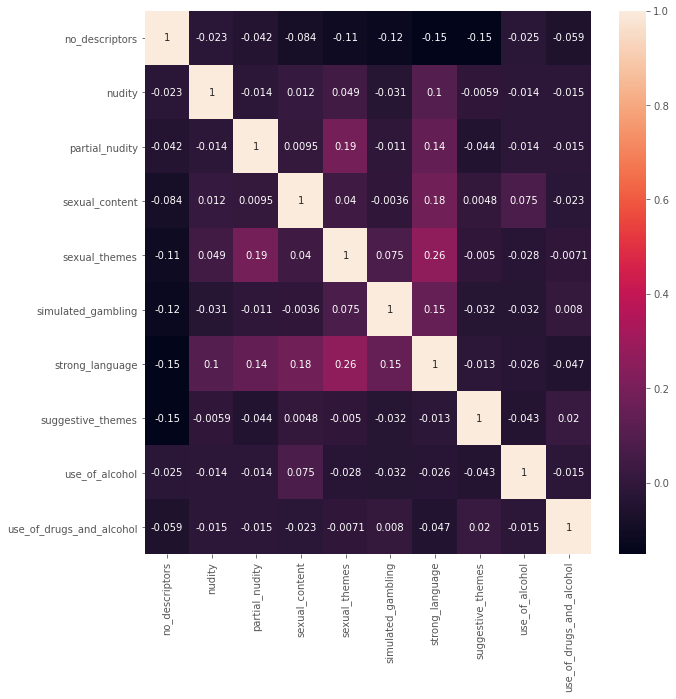

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(train.drop(columns="esrb_rating").corr(), annot=True)
plt.show()

In [13]:
train_X = df.loc[:, df.columns != "esrb_rating"].to_numpy()
train_Y = df[["esrb_rating"]].to_numpy()
train_Y = np.squeeze(train_Y)
train_Y


array([0, 1, 3, ..., 0, 2, 0], dtype=int64)

In [23]:
test_X = test_df.loc[:, test_df.columns != "esrb_rating"].to_numpy()
test_Y = test_df[["esrb_rating"]].to_numpy()
test_Y = np.squeeze(test_Y)
# test_Y


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# build KNN model and choose n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)
# train the model
knn.fit(train_X, train_Y)
# get the predict value from X_test
y_pred = knn.predict(test_X)
# print the score
print('accuracy: ', knn.score(test_X, test_Y))
# accuracy:  0.973684210526


accuracy:  0.798


In [29]:
# import k-folder
from sklearn.model_selection import cross_val_score
# use the same model as before
knn = KNeighborsClassifier(n_neighbors=5)
# X,y will automatically devided by 5 folder, the scoring I will still use the accuracy
scores = cross_val_score(knn, train_X, train_Y, cv=5, scoring='accuracy')
# print all 5 times scores
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]
# then I will do the average about these five scores to get more accuracy score.
print(scores.mean())
# 0.973333333333


[0.76455026 0.81746032 0.79365079 0.83597884 0.84350133]
0.8110283075800316


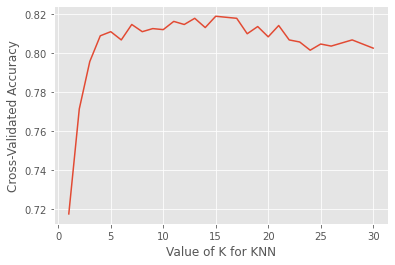

4


In [31]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_X, train_Y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()



In [38]:
k_to_be = np.argmax(k_scores) + 1
print(k_to_be)
print(max(k_scores))


15
0.8189690258655776


In [39]:
knn = KNeighborsClassifier(n_neighbors=k_to_be)
# train the model
knn.fit(train_X, train_Y)
# get the predict value from X_test
y_pred = knn.predict(test_X)
# print the score
print('accuracy: ', knn.score(test_X, test_Y))


accuracy:  0.802


<AxesSubplot:>

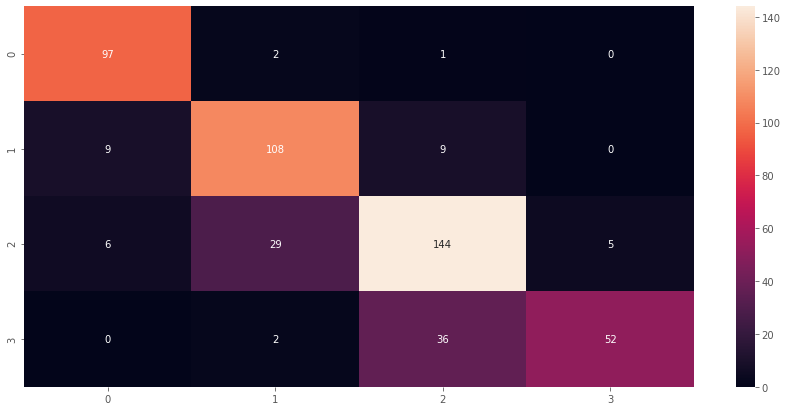

In [42]:
corr = confusion_matrix(test_Y, y_pred)
plt.figure(figsize = (15,7))
sns.heatmap(corr, annot = True, fmt = "g")